In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

## **Read in CSV Files**:

In [2]:
train_values_df = pd.read_csv('data/training_set_values.csv')
train_values_df.head(2) 

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [4]:
train_values_df['quantity'].value_counts()

enough          33186
insufficient    15129
dry              6246
seasonal         4050
unknown           789
Name: quantity, dtype: int64

In [5]:
no_pop = train_values_df[train_values_df['population'] == 0]
pd.set_option('display.max_columns', None)
no_pop['construction_year'].value_counts(normalize=True)

0       0.937000
2000    0.010336
2009    0.005051
2002    0.004817
1990    0.003508
2008    0.003040
2003    0.002806
1974    0.002759
1985    0.002713
2010    0.002105
1984    0.001964
1978    0.001918
1986    0.001824
2006    0.001777
1997    0.001684
1995    0.001543
1989    0.001450
1994    0.001450
1996    0.001169
1976    0.001076
1993    0.001029
1988    0.000982
2005    0.000935
2007    0.000935
1983    0.000889
1987    0.000795
1991    0.000702
2011    0.000702
1982    0.000561
1977    0.000514
2012    0.000468
1992    0.000468
1975    0.000281
1980    0.000187
1973    0.000187
1998    0.000140
1971    0.000094
2013    0.000047
1970    0.000047
1999    0.000047
Name: construction_year, dtype: float64

In [6]:
test_values_df = pd.read_csv('data/test_set_values.csv')
test_values_df.head(2)

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,50785,0.0,2013-02-04,Dmdd,1996,DMDD,35.290799,-4.059696,Dinamu Secondary School,0,Internal,Magoma,Manyara,21,3,Mbulu,Bashay,321,True,GeoData Consultants Ltd,Parastatal,NaN,True,2012,other,other,other,parastatal,parastatal,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other
1,51630,0.0,2013-02-04,Government Of Tanzania,1569,DWE,36.656709,-3.309214,Kimnyak,0,Pangani,Kimnyak,Arusha,2,2,Arusha Rural,Kimnyaki,300,True,GeoData Consultants Ltd,VWC,TPRI pipe line,True,2000,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe


In [7]:
submission_format_df = pd.read_csv('data/submission_format.csv')
submission_format_df.head()

,id,status_group
0,50785,predicted label
1,51630,predicted label
2,17168,predicted label
3,45559,predicted label
4,49871,predicted label


In [8]:
train_labels_df = pd.read_csv('data/training_set_labels.csv')
train_labels_df.head()

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


## **Merging Dataframes Above**

In [9]:
# merging train_values_df & train_labels_df
train_values_df = pd.merge(train_values_df, train_labels_df, on='id', how='left')
# merging test_values_df & submission_format_df
test_values_df = pd.merge(test_values_df, submission_format_df, on='id', how='left')

---

## **EDA**

In [10]:
print(f'train_values_df columns: \n{list(train_values_df.columns)}\n{train_values_df.shape}\n')
print(f'test_values_df columns: \n{list(test_values_df.columns)}\n{test_values_df.shape}\n')
print(f'submission_format_df columns: \n{list(submission_format_df.columns)}\n{submission_format_df.shape}\n')
print(f'train_labels_df columns: \n{list(train_labels_df.columns)}\n{train_labels_df.shape}\n')

train_values_df columns: 
['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height', 'installer', 'longitude', 'latitude', 'wpt_name', 'num_private', 'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga', 'ward', 'population', 'public_meeting', 'recorded_by', 'scheme_management', 'scheme_name', 'permit', 'construction_year', 'extraction_type', 'extraction_type_group', 'extraction_type_class', 'management', 'management_group', 'payment', 'payment_type', 'water_quality', 'quality_group', 'quantity', 'quantity_group', 'source', 'source_type', 'source_class', 'waterpoint_type', 'waterpoint_type_group', 'status_group']
(59400, 41)

test_values_df columns: 
['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height', 'installer', 'longitude', 'latitude', 'wpt_name', 'num_private', 'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga', 'ward', 'population', 'public_meeting', 'recorded_by', 'scheme_management', 'scheme_name', 'permit', 'construction_year',

---

## **Identify Missing Values**

#### (7) columns with missing values in **train_values_df**:

In [11]:
train_values_df.isna().sum().sort_values(ascending=False).head(7)

scheme_name          28166
scheme_management     3877
installer             3655
funder                3635
public_meeting        3334
permit                3056
subvillage             371
dtype: int64

#### (7) columns with missing values in **test_values_df**:

In [12]:
test_values_df.isna().sum().sort_values(ascending=False).head(7)

scheme_name          7092
scheme_management     969
installer             877
funder                869
public_meeting        821
permit                737
subvillage             99
dtype: int64

#### No values missing in **submission_format_df**:

In [13]:
submission_format_df.isna().sum().sort_values(ascending=False)

id              0
status_group    0
dtype: int64

#### No values missing in **train_labels_df**:

In [14]:
train_labels_df.isna().sum().sort_values(ascending=False)

id              0
status_group    0
dtype: int64

---

## **Data Limitations & Cleaning**

What we do to **train_values_df** we will do to **test_values_df**:
1. **Dropping Columns**:
- For example, **'scheme_name'** is missing 28,166 values out of 59,400 in train_values_df. As a result, we will drop this column and others we wont need.
2. **Dropping rows with missing values**:
- For rows with a few missing values, we will drop the rows so we can preserve the columns.
3. **Data Type Conversion**:
- The 'date_recorded' column was the only column that needed to be changes to datetime
4. **Renaming Columns**:
- Many of the columns have names that are confusing or dont represent the data. These have been changed.

In [15]:

# Dropping unneeded columns
dropped_columns = ['scheme_name', 'num_private', 'region_code', 'district_code',
                   'public_meeting', 'recorded_by', 'extraction_type',
                   'extraction_type_group', 'management', 'payment_type',
                   'water_quality', 'quantity_group', 'source_type', 'waterpoint_type' ,'payment_type' , 'funder' , 'subvillage', 'lga', 'construction_year', 'date_recorded'
                   ]
train_values_df = train_values_df.drop(columns=dropped_columns)
test_values_df = test_values_df.drop(columns=dropped_columns)


# Dropping rows with missing values
dropped_rows = ['scheme_management', 'installer', 'permit'
                ]
train_values_df.dropna(subset=dropped_rows, inplace=True)
test_values_df.dropna(subset=dropped_rows, inplace=True)

# Renaming Columns
renamed_col = {'amount_tsh': 'total_static_head(ft)', 'gps_height': 'height',
               'wpt_name': 'waterpoint_name', 'basin': 'basin_location',
                'permit': 'permit_approved',
               'extraction_type_class': 'extraction_method',
               'management_group': 'management_type',
                'quality_group': 'quality_of_water',
               'quantity': 'quantity_of_water', 'source': 'water_source'
               }
train_values_df = train_values_df.rename(columns=renamed_col)
test_values_df = test_values_df.rename(columns=renamed_col)


---

In [76]:
train_values_df['quantity'].value_counts()

enough          29955
insufficient    12224
dry              5444
seasonal         3010
Name: quantity_of_water, dtype: int64

In [17]:
# Adding Functional needs repairs values to Functional
train_values_df.loc[(train_values_df['status_group'] == 'functional needs repair'), 'status_group'] = "functional"
train_values_df['status_group'].value_counts()

functional        31691
non functional    19628
Name: status_group, dtype: int64

In [18]:
train_values_df['population'].value_counts().sort_values(ascending=False)[:20]

0      17905
1       5881
150     1770
200     1573
250     1481
300     1161
50      1071
100     1016
350      885
120      860
500      827
60       676
400      606
30       600
40       536
80       513
20       437
450      413
600      332
230      329
Name: population, dtype: int64

## **Sorting Dataframes**

In [19]:
train_values_df.columns[0:8]


Index(['id', 'total_static_head(ft)', 'height', 'installer', 'longitude',
       'latitude', 'waterpoint_name', 'basin_location'],
      dtype='object')

In [20]:
#if unknown makes up less than 1%, drop unknown rows from our table 
def drop_unknown(df, column):
    counts = df[column].value_counts(normalize=True)
    if 'unknown' in counts.index and counts['unknown'] < 0.01:
        df.drop(df[df[column] == 'unknown'].index, inplace=True)

#loop through columns to drop unknowns
for column in train_values_df.columns: 
    drop_unknown(train_values_df, column)

In [21]:
train_values_df['population'].value_counts()

0       17759
1        5709
150      1755
200      1558
250      1443
        ...  
1380        1
2698        1
3050        1
821         1
788         1
Name: population, Length: 1009, dtype: int64

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import log_loss

## Maddie's Model

In [23]:
from sklearn.tree import DecisionTreeClassifier

In [24]:
train_values_df.drop(['id', 'population', 'waterpoint_name', 'longitude', 'latitude', 'installer', 'scheme_management'], axis=1, inplace=True)


In [25]:

train_values_df['status_group'] = train_values_df['status_group'].map({'functional': 1, 'non functional': 0})


In [26]:
train_values_df['status_group'].value_counts()

1    31409
0    19224
Name: status_group, dtype: int64

In [27]:
#One Hot Encode categorical features 
from sklearn.preprocessing import OneHotEncoder
X = train_values_df.drop('status_group', axis=1)
y = train_values_df['status_group']

X_cats = X.select_dtypes(include='object')

ohe = OneHotEncoder(drop='first')
ohe.fit(X_cats)
X_cats_encoded = pd.DataFrame(ohe.transform(X_cats).todense(), columns=ohe.get_feature_names_out())


In [28]:
X_cats_encoded.shape

(50633, 1973)

In [29]:
#concat with numerical columns 
X_num = X.select_dtypes(exclude='object')
X_cats_encoded = X_cats_encoded.reset_index(drop=True)
X_num = X_num.reset_index(drop=True)

In [30]:
X_processed = pd.concat([X_num, X_cats_encoded], axis=1)

In [31]:
X_processed.shape

(50633, 1975)

In [32]:
#perform train-test split
X = X_processed
y = train_values_df['status_group']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [33]:
from sklearn.tree import DecisionTreeClassifier

In [34]:
#fit decision tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [35]:
#cross validation, using precision as our scoring metric 
from sklearn.model_selection import cross_val_score
cross_val_score(dt, X_train, y_train, cv=5, scoring='roc_auc')

array([0.82038378, 0.81359561, 0.82763161, 0.8121906 , 0.82002723])

In [36]:
#train precision score 
from sklearn.metrics import recall_score, accuracy_score, precision_score, f1_score, roc_auc_score
train_y_preds = dt.predict(X_train)
print(precision_score(y_train, train_y_preds))
print(roc_auc_score(y_train, train_y_preds))

0.9753604749787956
0.9670127448430277


In [37]:
#Find the depth of our current tree 
dt.get_depth()

176

## Address Overfitting

In [38]:
#decision tree 2: tuning max depth 
dt2 = DecisionTreeClassifier(max_depth=50)
dt2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=50)

In [39]:
#cross validation, using precision as our scoring metric 
from sklearn.model_selection import cross_val_score
cross_val_score(dt2, X_train, y_train, cv=5, scoring='f1')

array([0.861994  , 0.85904921, 0.86301513, 0.85084604, 0.85965279])

In [40]:
#experimenting with different max_depths
for i in [20, 30, 40, 50, 60, 70]:
    tree = DecisionTreeClassifier(max_depth=i)
    tree.fit(X_train, y_train)
    scores = cross_val_score(tree, X_train, y_train, cv=5, scoring='roc_auc')
    ave_auc = scores.mean()
    y_preds = tree.predict(X_train)
    train_auc = roc_auc_score(y_train, y_preds)
    print(f"max_depth: {i} \n scores: {scores} \n ave_auc: {ave_auc} \n train_auc: {train_auc}")

max_depth: 20 
 scores: [0.8388461  0.83506201 0.84010582 0.83490965 0.83784526] 
 ave_auc: 0.8373537680763281 
 train_auc: 0.8494055640395027
max_depth: 30 
 scores: [0.82373619 0.81934882 0.82775361 0.81163666 0.8129321 ] 
 ave_auc: 0.8190814764101274 
 train_auc: 0.9029160118962307
max_depth: 40 
 scores: [0.81828254 0.80944346 0.81412108 0.80126301 0.80478538] 
 ave_auc: 0.8095790916606873 
 train_auc: 0.9288008066226184
max_depth: 50 
 scores: [0.81146153 0.80895286 0.81350807 0.80728217 0.81208195] 
 ave_auc: 0.8106573148379894 
 train_auc: 0.9442531569956393
max_depth: 60 
 scores: [0.81448515 0.81094797 0.8195927  0.80785151 0.81992922] 
 ave_auc: 0.8145613134191689 
 train_auc: 0.9554434432703027
max_depth: 70 
 scores: [0.82148412 0.80993232 0.8188801  0.81412439 0.818881  ] 
 ave_auc: 0.8166603863382578 
 train_auc: 0.9601777840438784


The model performs better on cross-validation with smaller max_depths, and is prone to overfitting with larger max_depths. 

In [41]:
#experimenting with different min_sample_splits
for i in [5, 10, 20, 50, 100, 150, 200]:
    tree = DecisionTreeClassifier(max_depth=30, min_samples_split=i)
    tree.fit(X_train, y_train)
    scores = cross_val_score(tree, X_train, y_train, cv=5, scoring='roc_auc')
    ave_auc = scores.mean()
    y_preds = tree.predict(X_train)
    train_auc = roc_auc_score(y_train, y_preds)
    print(f"min_sample_splits: {i} \n scores: {scores} \n ave_auc: {ave_auc} \n train_auc: {train_auc}")

min_sample_splits: 5 
 scores: [0.83765831 0.83868218 0.84465203 0.82935652 0.82977399] 
 ave_auc: 0.8360246065996128 
 train_auc: 0.8902996181009253
min_sample_splits: 10 
 scores: [0.85331671 0.85111726 0.85521975 0.84466091 0.84270785] 
 ave_auc: 0.8494044947113981 
 train_auc: 0.8781916115738138
min_sample_splits: 20 
 scores: [0.86179343 0.8604791  0.86695969 0.85419256 0.85728227] 
 ave_auc: 0.8601414102786304 
 train_auc: 0.8650047417521567
min_sample_splits: 50 
 scores: [0.87088689 0.86996249 0.87366371 0.86295759 0.86610534] 
 ave_auc: 0.868715204497889 
 train_auc: 0.8483847388904312
min_sample_splits: 100 
 scores: [0.87143476 0.87136316 0.87473036 0.86502421 0.87035708] 
 ave_auc: 0.8705819129015753 
 train_auc: 0.8330469229812614
min_sample_splits: 150 
 scores: [0.87036133 0.87293338 0.87423906 0.8677906  0.86817987] 
 ave_auc: 0.8707008464406645 
 train_auc: 0.826215912561293
min_sample_splits: 200 
 scores: [0.86522931 0.87247462 0.87419761 0.86455155 0.86868259] 
 ave

In [53]:
for i in [5, 10, 20, 50, 100, 150, 200]:
    tree = DecisionTreeClassifier(max_depth=30, min_samples_split=i)
    tree.fit(X_train, y_train)
    scores = cross_val_score(tree, X_train, y_train, cv=5, scoring='f1')
    ave_f1 = scores.mean()
    y_preds = tree.predict(X_train)
    train_f1 = f1_score(y_train, y_preds)
    print(f"min_sample_splits: {i} \n scores: {scores} \n ave_f1: {ave_f1} \n train_f1: {train_f1}")

min_sample_splits: 5 
 scores: [0.86564123 0.86569612 0.86860051 0.86106807 0.86175163] 
 ave_f1: 0.8645515136452439 
 train_f1: 0.9275879026309318
min_sample_splits: 10 
 scores: [0.86727642 0.86713143 0.8675827  0.86038593 0.86112258] 
 ave_f1: 0.8646998107256755 
 train_f1: 0.9196910250122609
min_sample_splits: 20 
 scores: [0.86762619 0.86838618 0.86609049 0.85996502 0.86278544] 
 ave_f1: 0.8649706624258344 
 train_f1: 0.9105521897884667
min_sample_splits: 50 
 scores: [0.86996873 0.86652435 0.86434818 0.86196319 0.86252431] 
 ave_f1: 0.865065751270623 
 train_f1: 0.9003122845439429
min_sample_splits: 100 
 scores: [0.86539046 0.8626094  0.86256892 0.85906451 0.86175068] 
 ave_f1: 0.8622767946235482 
 train_f1: 0.8903596656344243
min_sample_splits: 150 
 scores: [0.86347161 0.85833503 0.85952599 0.85887832 0.86035671] 
 ave_f1: 0.860113529931958 
 train_f1: 0.8842894790188526
min_sample_splits: 200 
 scores: [0.8576319  0.85870778 0.85981119 0.85630439 0.86008688] 
 ave_f1: 0.85850

In [54]:
#find out which features are most influential 
dt3 = DecisionTreeClassifier(max_depth=30, min_samples_split=50)
dt3.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=30, min_samples_split=50)

In [55]:
#get feaure 
importances = dt3.feature_importances_
features = dt3.feature_names_in_

together = zip(features, importances)

togetherdf = pd.DataFrame(together, columns=['feature', 'importance'])

In [56]:
togetherdf.sort_values('importance', ascending=False).head(20)

,feature,importance
1941,extraction_method_other,0.150563
1961,quantity_of_water_seasonal,0.106691
1959,quantity_of_water_enough,0.097146
1960,quantity_of_water_insufficient,0.078286
1,height,0.045506
0,total_static_head(ft),0.037970
1943,extraction_method_submersible,0.019511
1964,water_source_machine dbh,0.018830
1974,waterpoint_type_group_other,0.018126
1951,payment_pay per bucket,0.017721


## Evaluate Model on Test Set

In [57]:
#predict from X_test
y_preds = dt3.predict(X_test)


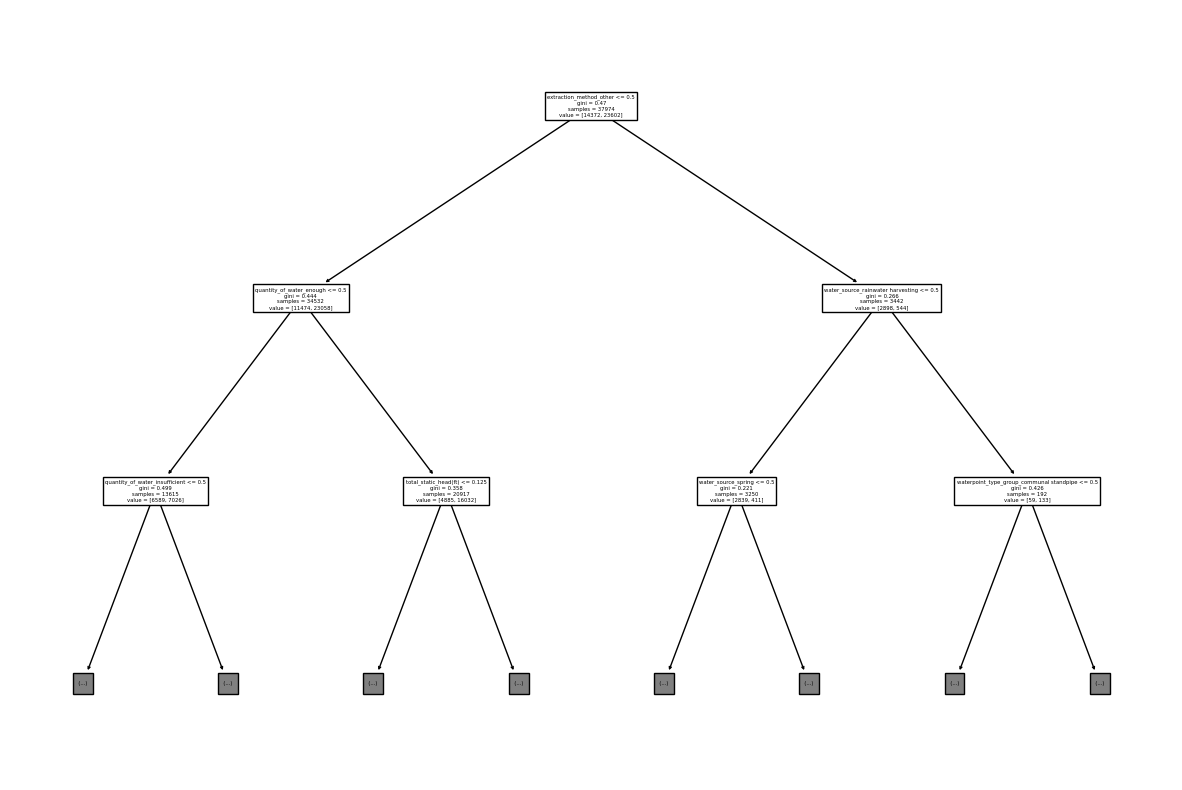

In [72]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(15,10))
plot_tree(dt3, max_depth=2, ax=ax, feature_names=X.columns);

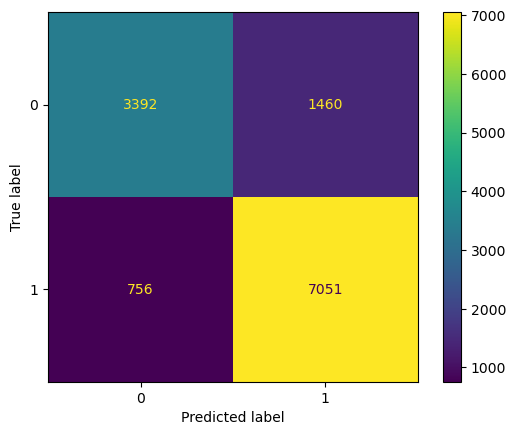

In [58]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

ConfusionMatrixDisplay.from_estimator(dt3, X_test, y_test)

In [49]:
from sklearn.metrics import recall_score, accuracy_score, precision_score, f1_score

In [59]:
recall = recall_score(y_test, y_preds)
accuracy = accuracy_score(y_test, y_preds)
f1 = f1_score(y_test, y_preds)
auc = roc_auc_score(y_test, y_preds)
precision = precision_score(y_test, y_preds)

print(f'recall: {recall}')
print(f'accuracy: {accuracy}')
print(f'f1: {f1}')
print(f'auc: {auc}')
print(f'precision: {precision}')

recall: 0.9031638273344434
accuracy: 0.8249466782526266
f1: 0.8641990440004902
auc: 0.8011284923976422
precision: 0.8284572905651509
